In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

vMass_OS = [93470.0, 89154.0, 83733.0, 80295.0, 76234.0, 71664.0, 68589.0, 65228.0, 61727.0, 58942.0, 56171.0, 
                 53304.0, 50137.0, 48177.0, 45405.0, 43092.0, 40689.0, 38742.0, 37198.0, 35434.0, 33522.0, 32075.0, 
                 30305.0, 28693.0, 27618.0, 26370.0, 25262.0, 23987.0, 23203.0, 22220.0, 21071.0, 20411.0, 19732.0, 
                 18966.0, 18296.0, 18066.0, 17785.0, 17759.0, 18112.0, 18770.0, 21067.0, 23969.0, 29539.0, 38275.0, 
                 47773.0, 53561.0, 49775.0, 37949.0, 24622.0, 15769.0, 11335.0, 9280.0, 8281.0, 7547.0, 7049.0, 6682.0, 
                 6503.0, 6294.0, 6136.0, 6066.0, 5940.0, 5994.0, 5759.0, 5613.0, 5292.0, 4762.0, 4448.0, 4106.0, 3999.0, 
                 3947.0, 3744.0, 3624.0, 3469.0, 3461.0, 3262.0, 3175.0, 3200.0, 2922.0, 2959.0, 2832.0, 2714.0, 2696.0, 
                 2637.0, 2472.0, 2490.0, 2369.0, 2264.0, 2254.0, 2096.0, 2080.0, 1995.0, 2086.0, 1921.0, 1930.0, 1859.0, 
                 1800.0, 1798.0, 1684.0, 1738.0, 1598.0]

vMass_LS = [23279.0, 22205.0, 21061.0, 20075.0, 19196.0, 18035.0, 17434.0, 16523.0, 15506.0, 14831.0, 
                 14398.0, 13281.0, 12849.0, 12153.0, 11671.0, 11325.0, 10579.0, 10303.0, 9787.0, 9396.0, 8978.0, 
                 8667.0, 8333.0, 7927.0, 7487.0, 7266.0, 6830.0, 6702.0, 6588.0, 6180.0, 6001.0, 5779.0, 5610.0, 
                 5470.0, 5242.0, 5078.0, 4887.0, 4606.0, 4536.0, 4306.0, 4238.0, 4102.0, 3996.0, 3776.0, 3761.0, 
                 3639.0, 3461.0, 3402.0, 3224.0, 3179.0, 3057.0, 3031.0, 2936.0, 2783.0, 2730.0, 2651.0, 2620.0, 
                 2462.0, 2488.0, 2363.0, 2339.0, 2207.0, 2142.0, 2222.0, 2061.0, 1871.0, 1992.0, 1989.0, 1928.0, 
                 1851.0, 1822.0, 1725.0, 1730.0, 1692.0, 1614.0, 1604.0, 1562.0, 1453.0, 1395.0, 1428.0, 1339.0, 
                 1302.0, 1410.0, 1296.0, 1329.0, 1252.0, 1151.0, 1288.0, 1220.0, 1199.0, 1114.0, 1145.0, 1068.0, 
                 1116.0, 1074.0, 1054.0, 1012.0, 987.0, 999.0, 906.0]

vMass_JPsi = [133.0, 137.0, 168.0, 165.0, 211.0, 239.0, 218.0, 280.0, 318.0, 323.0, 353.0, 364.0, 
                       406.0, 472.0, 558.0, 600.0, 667.0, 757.0, 822.0, 907.0, 1008.0, 1061.0, 1249.0, 1287.0, 
                       1484.0, 1680.0, 1808.0, 2132.0, 2371.0, 2610.0, 2878.0, 3354.0, 3951.0, 4538.0, 5431.0, 
                       6467.0, 8167.0, 10074.0, 13005.0, 16901.0, 22799.0, 32643.0, 48350.0, 74806.0, 111230.0, 
                       140035.0, 134546.0, 90804.0, 43232.0, 16382.0, 6051.0, 2721.0, 1588.0, 974.0, 663.0, 
                       460.0, 372.0, 258.0, 231.0, 175.0, 149.0, 111.0, 104.0, 88.0, 74.0, 76.0, 55.0, 33.0, 
                       39.0, 37.0, 37.0, 24.0, 30.0, 19.0, 19.0, 15.0, 15.0, 15.0, 10.0, 15.0, 16.0, 8.0, 6.0, 
                       6.0, 10.0, 5.0, 7.0, 2.0, 5.0, 3.0, 7.0, 5.0, 9.0, 4.0, 5.0, 1.0, 4.0, 6.0, 5.0, 4.0]

vMass_Psi = [35.0, 42.0, 50.0, 41.0, 46.0, 55.0, 41.0, 65.0, 60.0, 74.0, 71.0, 82.0, 72.0, 95.0, 99.0, 
                  112.0, 112.0, 126.0, 154.0, 133.0, 159.0, 177.0, 177.0, 208.0, 224.0, 204.0, 248.0, 289.0, 
                  299.0, 352.0, 362.0, 389.0, 409.0, 470.0, 540.0, 547.0, 689.0, 631.0, 657.0, 817.0, 834.0, 
                  929.0, 999.0, 1082.0, 1209.0, 1323.0, 1469.0, 1770.0, 2044.0, 2376.0, 2787.0, 3241.0, 4022.0, 
                  4843.0, 5918.0, 7315.0, 9285.0, 12472.0, 17687.0, 26261.0, 39206.0, 56653.0, 69329.0, 65529.0, 
                  44982.0, 21866.0, 8489.0, 3141.0, 1376.0, 746.0, 460.0, 342.0, 235.0, 167.0, 135.0, 111.0, 98.0, 
                  59.0, 60.0, 52.0, 40.0, 38.0, 27.0, 30.0, 31.0, 26.0, 20.0, 13.0, 17.0, 20.0, 10.0, 10.0, 16.0, 
                  14.0, 10.0, 9.0, 8.0, 6.0, 9.0, 5.0]

In [3]:
def funcVec(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

In [4]:
x_data = X
y_data = vMass_JPsi
y_error = np.sqrt(y_data)

In [5]:
N = np.max(y_data)
mu = 3.10092060e+00
sigma = 6.30177129e-02
alphaL = 9.05277095e-01
nL = 2.87829299e+00 
alphaR = 2.13587015e+00
nR = 2.67444746e+00

In [6]:
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(funcVec, xdata = x_data, ydata = y_data, sigma = y_error, p0 = [N, mu, sigma, alphaL, nL, alphaR, nR], method = 'trf', full_output = True)

print("popt: \n", popt_JPsi) 
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [1.44203015e+05 3.10092062e+00 6.30176935e-02 9.05276556e-01
 2.87829440e+00 2.13586980e+00 2.67444747e+00]
pcov: 
 [[ 5.99946097e+05  8.93271245e-02 -1.82141440e-01 -7.15820006e-01
  -1.20290315e+00 -3.91750825e+00  6.81640367e+00]
 [ 8.93271245e-02  1.96831155e-07 -1.14067220e-07 -3.31837910e-06
   8.73242043e-06 -1.70767714e-06  1.09881153e-06]
 [-1.82141440e-01 -1.14067220e-07  1.53175941e-07  2.81102102e-06
  -5.60049983e-06  4.39168080e-06 -6.77317069e-06]
 [-7.15820006e-01 -3.31837910e-06  2.81102102e-06  1.30849793e-04
  -4.66934039e-04  7.48418647e-05 -9.78104724e-05]
 [-1.20290315e+00  8.73242043e-06 -5.60049983e-06 -4.66934039e-04
   2.40838083e-03 -1.28868092e-04  1.33885484e-04]
 [-3.91750825e+00 -1.70767714e-06  4.39168080e-06  7.48418647e-05
  -1.28868092e-04  9.36380523e-04 -2.79256465e-03]
 [ 6.81640367e+00  1.09881153e-06 -6.77317069e-06 -9.78104724e-05
   1.33885484e-04 -2.79256465e-03  1.20825004e-02]]
residual: 
 {'nfev': 3, 'fvec': array([  5.32162478,   5

fit error : 774.56188415768


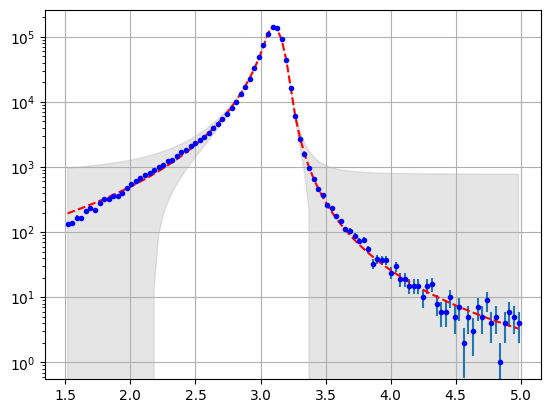

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'blue', mec = 'blue', ms = 2, mew = 2, ls = '')

x_data_fit = np.linspace(min(x_data), max(x_data), len(x_data))
y_data_fit = funcVec(x_data_fit, *popt_JPsi)
plt.plot(x_data_fit, y_data_fit, '--r')
plt.yscale('log')
plt.grid(True)

sigmas = np.diag(pcov_JPsi)
e_data_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_data_fit)

plt.fill_between(x_data_fit, y_data_fit - e_data_fit, y_data_fit + e_data_fit, color = 'gray', alpha = 0.2)

In [8]:
x_data = X
y_data = vMass_Psi
y_error = np.sqrt(y_data)

In [9]:
N = np.max(y_data)
mu = 3.69398193e+00
sigma = 6.49862442e-02
alphaL = 8.78068335e-01
nL = 2.75681034e+00
alphaR = 2.21346151e+00
nR = 2.44662574e+00

In [10]:
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(funcVec, xdata = x_data, ydata = y_data, sigma = y_error, p0 = [N, mu, sigma, alphaL, nL, alphaR, nR], method = 'trf', full_output = True)

print("popt: \n", popt_Psi) 
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [7.10129423e+04 3.69398197e+00 6.49862141e-02 8.78067616e-01
 2.75681185e+00 2.21346044e+00 2.44662795e+00]
pcov: 
 [[ 2.01029426e+05  6.48563646e-02 -1.30042795e-01 -4.43855185e-01
  -7.88002870e-01 -3.11336225e+00  6.16709438e+00]
 [ 6.48563646e-02  3.02096887e-07 -1.77873870e-07 -4.53061526e-06
   1.01029979e-05 -2.89678335e-06  2.85728676e-06]
 [-1.30042795e-01 -1.77873870e-07  2.34959845e-07  3.85791979e-06
  -6.43002561e-06  7.25058280e-06 -1.27171609e-05]
 [-4.43855185e-01 -4.53061526e-06  3.85791979e-06  1.54095223e-04
  -4.67039444e-04  1.10007480e-04 -1.68654807e-04]
 [-7.88002870e-01  1.01029979e-05 -6.43002561e-06 -4.67039444e-04
   2.11850286e-03 -1.55635460e-04  1.96438994e-04]
 [-3.11336225e+00 -2.89678335e-06  7.25058280e-06  1.10007480e-04
  -1.55635460e-04  1.59722366e-03 -4.78814840e-03]
 [ 6.16709438e+00  2.85728676e-06 -1.27171609e-05 -1.68654807e-04
   1.96438994e-04 -4.78814840e-03  1.95515972e-02]]
residual: 
 {'nfev': 3, 'fvec': array([ 4.07228004,  3.0

fit error : 448.3630774106093


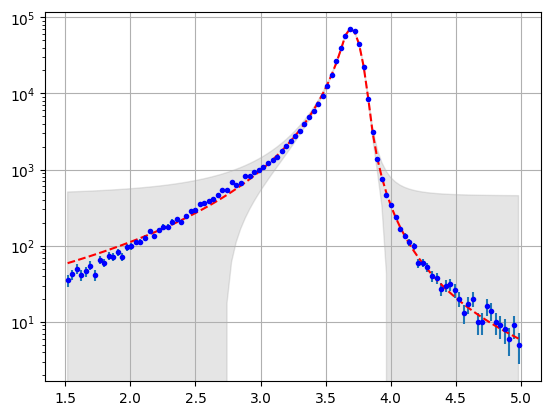

In [11]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc='blue', mec='blue', ms=2, mew=2, ls='')

x_data_fit = np.linspace(min(x_data), max(x_data), len(x_data))
y_data_fit = funcVec(x_data_fit, *popt_Psi)
plt.plot(x_data_fit, y_data_fit, '--r')
plt.yscale('log')
plt.grid(True)

sigmas = np.diag(pcov_Psi)
e_data_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_data_fit)

plt.fill_between(x_data_fit, y_data_fit - e_data_fit, y_data_fit + e_data_fit, color = 'gray', alpha = 0.2)

In [12]:
x_data = X
y_data = vMass_LS
y_error = np.sqrt(y_data)

In [13]:
N = np.max(y_data)
alpha = 1.81200533e+01
beta1 = -5.67598247e-01
beta2 = -1.84510549e+00

In [14]:
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(DE, xdata = x_data, ydata = y_data, sigma = y_error, p0 = [N, alpha, beta1, beta2], method = 'trf', full_output = True)

print("popt: \n", popt_bckg) 
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [ 1.53341353e+04  1.81200459e+01 -5.67598404e-01 -1.84510583e+00]
pcov: 
 [[ 1.43425649e+06 -9.85543520e+02 -1.96796836e+01 -4.00304972e+01]
 [-9.85543520e+02  7.94562957e-01  1.38409039e-02  2.39052072e-02]
 [-1.96796836e+01  1.38409039e-02  2.72029212e-04  5.38314924e-04]
 [-4.00304972e+01  2.39052072e-02  5.38314924e-04  1.23113712e-03]]
residual: 
 {'nfev': 3, 'fvec': array([ 0.64537437, -0.07860494,  0.11505796, -0.34217681, -1.15607796,
        0.49846444, -1.61004991, -1.02688294,  0.81651124,  0.3085759 ,
       -1.89143203,  2.00932735,  0.36857378,  1.36510557,  0.71852204,
       -0.9468538 ,  1.45357483, -0.42637158,  0.29594327,  0.00688189,
        0.22666213, -0.46854974, -0.72158369,  0.02874447,  1.41654245,
        0.47080385,  2.27818525,  0.5264783 , -1.25979135,  0.75582128,
        0.05627698,  0.05088036, -0.51696298, -1.35247483, -0.8789903 ,
       -1.15220336, -0.92897248,  0.74214749, -0.55877608,  0.63435406,
       -0.52619498, -0.5567298 , -0.96393

fit error : 1197.6048139876807


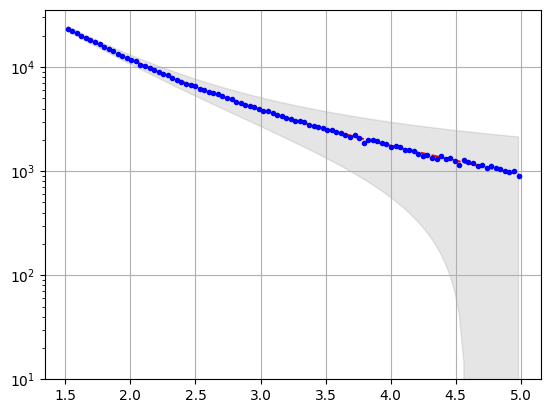

In [15]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc='blue', mec='blue', ms=2, mew=2, ls='')

x_data_fit = np.linspace(min(x_data), max(x_data), len(x_data))
y_data_fit = DE(x_data_fit, *popt_bckg)
plt.plot(x_data_fit, y_data_fit, '--r')
plt.yscale('log')
plt.grid(True)

sigmas = np.diag(pcov_bckg)
e_data_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_data_fit)

plt.fill_between(x_data_fit, y_data_fit - e_data_fit, y_data_fit + e_data_fit, color = 'gray', alpha = 0.2)

In [16]:
x_data = X
y_data = vMass_OS
y_error = np.sqrt(y_data)

In [17]:
def fitFunc(x,
            N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1,
            N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2,
            Nbg, a1, a2, a3):
    return 1*funcVec(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1) + 1*funcVec(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2) + DE(x, Nbg, a1, a2, a3)

In [18]:
bounds_JPsi = ([], [])

for i, j in zip([*popt_JPsi*(1-1/20)], [*popt_JPsi*(1+1/20)]):
    bounds_JPsi[0].append(min(i, j))
    bounds_JPsi[1].append(max(i, j))
    
print(bounds_JPsi)

y_JPsi = 10000
bounds_JPsi[0][0] = min(y_JPsi, popt_JPsi[0])
bounds_JPsi[1][0] = max(y_JPsi, popt_JPsi[0])

print(bounds_JPsi)

([136992.8641611553, 2.945874589919015, 0.059866808822127686, 0.860012727989313, 2.734379675280978, 2.029076314093948, 2.5407250937700665], [151413.16565180325, 3.2559666520157533, 0.06616857817182534, 0.9505403835671355, 3.0222091147842387, 2.24266329452489, 2.808169840482705])
([10000, 2.945874589919015, 0.059866808822127686, 0.860012727989313, 2.734379675280978, 2.029076314093948, 2.5407250937700665], [144203.01490647928, 3.2559666520157533, 0.06616857817182534, 0.9505403835671355, 3.0222091147842387, 2.24266329452489, 2.808169840482705])


In [19]:
bounds_Psi = ([], [])

for i, j in zip([*popt_Psi*(1-1/5)], [*popt_Psi*(1+1/5)]):
    bounds_Psi[0].append(min(i, j))
    bounds_Psi[1].append(max(i, j))
    
print(bounds_Psi)

y_Psi = 1000
bounds_Psi[0][0] = min(y_Psi, popt_Psi[0])
bounds_Psi[1][0] = max(y_Psi, popt_Psi[0])

print(bounds_Psi)

([56810.35385523276, 2.9551855731401417, 0.0519889712895713, 0.7024540930742567, 2.205449479195529, 1.7707683534318588, 1.9573023608535092], [85215.53078284913, 4.432778359710212, 0.07798345693435695, 1.0536811396113848, 3.3081742187932925, 2.656152530147788, 2.9359535412802638])
([1000, 2.9551855731401417, 0.0519889712895713, 0.7024540930742567, 2.205449479195529, 1.7707683534318588, 1.9573023608535092], [71012.94231904094, 4.432778359710212, 0.07798345693435695, 1.0536811396113848, 3.3081742187932925, 2.656152530147788, 2.9359535412802638])


In [20]:
bounds_bckg = ([], [])

for i, j in zip([*popt_bckg*(1-1.5)], [*popt_bckg*(1+1.5)]):
    bounds_bckg[0].append(min(i, j))
    bounds_bckg[1].append(max(i, j))
    
print(bounds_bckg)

y_bckg = 100000
bounds_bckg[0][0] = min(y_bckg, popt_bckg[0])
bounds_bckg[1][0] = max(y_bckg, popt_bckg[0])

print(bounds_bckg)

([-7667.067634107363, -9.060022946990028, -1.4189960106215729, -4.612764572016224], [38335.338170536816, 45.30011473495014, 0.2837992021243146, 0.9225529144032448])
([15334.135268214726, -9.060022946990028, -1.4189960106215729, -4.612764572016224], [100000, 45.30011473495014, 0.2837992021243146, 0.9225529144032448])


In [21]:
bounds = (np.concatenate([bounds_JPsi[0], bounds_Psi[0], bounds_bckg[0]]), np.concatenate([bounds_JPsi[1], bounds_Psi[1], bounds_bckg[1]]))
print(bounds)

(array([ 1.00000000e+04,  2.94587459e+00,  5.98668088e-02,  8.60012728e-01,
        2.73437968e+00,  2.02907631e+00,  2.54072509e+00,  1.00000000e+03,
        2.95518557e+00,  5.19889713e-02,  7.02454093e-01,  2.20544948e+00,
        1.77076835e+00,  1.95730236e+00,  1.53341353e+04, -9.06002295e+00,
       -1.41899601e+00, -4.61276457e+00]), array([1.44203015e+05, 3.25596665e+00, 6.61685782e-02, 9.50540384e-01,
       3.02220911e+00, 2.24266329e+00, 2.80816984e+00, 7.10129423e+04,
       4.43277836e+00, 7.79834569e-02, 1.05368114e+00, 3.30817422e+00,
       2.65615253e+00, 2.93595354e+00, 1.00000000e+05, 4.53001147e+01,
       2.83799202e-01, 9.22552914e-01]))


In [22]:
popt, pcov, nfev, fvec, fjac = curve_fit(fitFunc, xdata = x_data, ydata = y_data, sigma = y_error, p0 = [*popt_JPsi, *popt_Psi, *popt_bckg], bounds = bounds,  method = 'trf', full_output = True)

print("popt: \n", popt) 
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [ 4.55480661e+04  3.09865210e+00  6.61685782e-02  8.82346075e-01
  3.02220911e+00  2.02907631e+00  2.80816984e+00  1.00000000e+03
  3.69645336e+00  5.19889713e-02  1.05368114e+00  3.30817422e+00
  2.65615253e+00  2.93595354e+00  2.27919897e+04  4.53001147e+01
 -5.76132695e-01 -1.64742979e+00]
pcov: 
 [[ 2.71035250e+05  7.82634109e-02 -1.87389238e-01  2.29977400e+00
  -9.34450271e+01  3.06791389e+00 -3.69151812e+02  9.65567119e+03
   2.86191059e-01  6.55621957e-01 -8.56003674e+01  1.71488243e+03
   1.69491018e+03 -4.22257072e+04 -2.27781454e+06  4.42679688e+03
   1.92877257e+01  6.67238668e+00]
 [ 7.82634109e-02  1.17730297e-06 -7.86699147e-07 -3.66703437e-05
   3.28125978e-04 -1.57309320e-05  1.75169345e-04 -1.10241072e-02
   4.03157005e-08 -8.50924875e-07 -2.06970832e-05  1.18265947e-03
  -1.13099538e-03  3.18585436e-02  8.83030522e-01 -1.94285193e-03
  -8.14730021e-06  6.47555754e-07]
 [-1.87389238e-01 -7.86699147e-07  1.36897607e-06  3.89389033e-05
  -4.18957652e-04  1.01016

fit error : 16754.391498496003


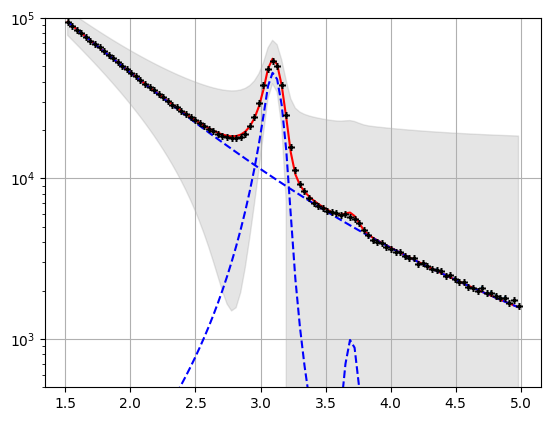

In [23]:
x_data_fit = np.linspace(min(x_data), max(x_data), len(x_data))
plt.errorbar(x_data, y_data, y_error, marker='+', mfc='black', mec='black', ms=2, mew=5, ls='')

y_data_fit = fitFunc(x_data_fit, *popt)
plt.plot(x_data_fit, y_data_fit, '-r')
plt.plot(x_data_fit, funcVec(x_data_fit, *popt[:7]), '--b')
plt.plot(x_data_fit, funcVec(x_data_fit, *popt[7:14]), '--b')
plt.plot(x_data_fit, DE(x_data_fit, *popt[14:18]), '--b')
plt.yscale('log')
plt.ylim(500, 100000)
plt.grid(True)

sigmas = np.diag(pcov)
e_data_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_data_fit)

plt.fill_between(x_data_fit, y_data_fit - e_data_fit, y_data_fit + e_data_fit, color = 'gray', alpha = 0.2)